In [97]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = ""

loss_value = .1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 1000
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mo

In [98]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Model_0: first exceedance at index 1129 (value=0.10202421247959137, threshold=0.1)
Appended cutoff for model_40_data_10 | target=0, cutoff_idx=1129
Model_0: first exceedance at index 1129 (value=0.10279382765293121, threshold=0.1)
Appended cutoff for model_0_data_10 | target=0, cutoff_idx=1129
Model_0: first exceedance at index 1134 (value=0.10437838733196259, threshold=0.1)
Appended cutoff for model_22_data_10 | target=0, cutoff_idx=1134
Model_0: first exceedance at index 1134 (value=0.10254689306020737, threshold=0.1)
Appended cutoff for model_32_data_10 | target=0, cutoff_idx=1134
Model_0: first exceedance at index 1129 (value=0.10138324648141861, threshold=0.1)
Appended cutoff for model_14_d

/Users/brycesandlund/miniconda3/envs/minima-volume-project/lib/python3.10/site-packages/numpy/_core/_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Plotting minima trained with 10000 additional data points


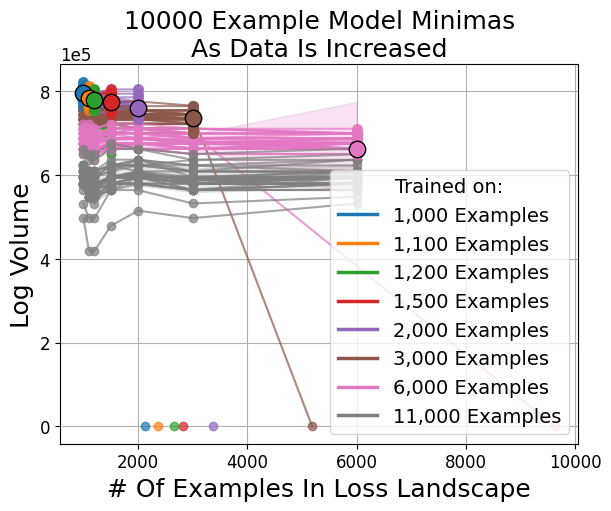

In [99]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],        
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    suptitle=f"{problem_name}",
    title=f"10000 Example Model Minimas\nAs Data Is Increased",
    log_scale = data_level_log,
    alpha=0.7,
    plot_average=True,
    plot_only_average=False,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
    plot_accuracy_colors=False,
    # plot_only_add_train_level=2000,
)